# Analysis of Air Quality in India (2015-2020)

**Author:** Himanshu

## 1. Objective
This project performs an exploratory data analysis (EDA) on air quality data from various cities across India. The main goals are to:
1.  Clean and preprocess multiple datasets by handling missing values and ensuring correct data types.
2.  Identify the most polluted states and cities based on AQI and PM2.5 levels.
3.  Analyze temporal trends to understand how pollution levels change monthly and seasonally.
4.  Investigate relationships between different pollutants.

In [80]:
import pandas as pd

## 2. Data Loading and Preparation
First, we load the required libraries and all five datasets. The date/time columns are immediately converted to the `datetime` format, which is essential for proper time-series analysis.

In [81]:
city_day = pd.read_csv("city_day.csv")
city_hour = pd.read_csv("city_hour.csv")
station_day = pd.read_csv("station_day.csv")
station_hour = pd.read_csv("station_hour.csv")
stations = pd.read_csv("stations.csv")

C:\Users\Rk\AppData\Local\Temp\ipykernel_9780\2105463663.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  station_hour = pd.read_csv("station_hour.csv")


In [82]:
city_day['Date'] = pd.to_datetime(city_day['Date'])
city_hour['Datetime'] = pd.to_datetime(city_hour['Datetime'])
station_day['Date'] = pd.to_datetime(station_day['Date'])
station_hour['Datetime'] = pd.to_datetime(station_hour['Datetime'])

In [83]:
city_day.shape

(29531, 16)

In [84]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## 3. Data Cleaning: Handling Missing Values
The raw data contains a significant number of missing values (`NaN`). Simply filling them with `0` would be incorrect, as it implies "zero pollution" and would skew the analysis.

A more appropriate strategy for this time-series data is **forward-fill (`ffill`)**. This method propagates the last valid observation forward, which is a reasonable assumption for environmental data where conditions don't change instantaneously. A **backward-fill (`bfill`)** is used afterward to handle any remaining `NaN` values at the very beginning of the dataset.

In [85]:
city_day["PM2.5"].isna().sum()

np.int64(4598)

In [86]:
# List of all pollutant columns to fill
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

city_day[pollutant_cols] = city_day[pollutant_cols].ffill()

city_day['AQI_Bucket'] = city_day['AQI_Bucket'].ffill()

city_day.bfill(inplace=True)

In [87]:
city_day["PM2.5"].isna().sum()

np.int64(0)

In [88]:
city_day["PM10"].isna().sum()

np.int64(0)

In [89]:
# For city_hour 
city_hour = city_hour.ffill().bfill()

# For station_day 
station_day = station_day.ffill().bfill()

# For station_hour 
station_hour = station_hour.ffill().bfill()

In [90]:
city_day.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [91]:
city_day.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [92]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor


In [93]:
city_hour.isna().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [94]:
city_hour.fillna(0)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,36.60,120.06,1.00,40.01,36.37,19.88,1.00,122.07,153.58,0.0,0.0,0.0,288.0,Poor
1,Ahmedabad,2015-01-01 02:00:00,36.60,120.06,0.02,27.75,19.73,19.88,0.02,85.90,153.58,0.0,0.0,0.0,288.0,Poor
2,Ahmedabad,2015-01-01 03:00:00,36.60,120.06,0.08,19.32,11.08,19.88,0.08,52.83,153.58,0.0,0.0,0.0,288.0,Poor
3,Ahmedabad,2015-01-01 04:00:00,36.60,120.06,0.30,16.45,9.20,19.88,0.30,39.53,153.58,0.0,0.0,0.0,288.0,Poor
4,Ahmedabad,2015-01-01 05:00:00,36.60,120.06,0.12,14.90,7.85,19.88,0.12,32.63,153.58,0.0,0.0,0.0,288.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,1.85,27.75,0.0,0.0,0.0,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,0.0,0.0,0.0,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,0.0,0.0,0.0,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,0.0,0.0,0.0,50.0,Good


In [95]:
station_day.fillna(0)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,184.0,Moderate
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,23.51,16.50,40.02,25.09,0.69,4.36,30.59,1.32,7.26,2.42,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,23.51,16.50,40.02,25.09,0.68,3.49,38.95,1.42,7.92,2.42,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,2.42,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,2.42,57.0,Satisfactory


In [96]:
station_hour.fillna(0)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.10,11.85,126.40,0.10,6.10,0.10,155.0,Moderate
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.10,13.17,117.12,0.10,6.25,0.15,155.0,Moderate
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.10,12.08,98.98,0.20,5.98,0.18,155.0,Moderate
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.10,10.47,112.20,0.20,6.72,0.10,155.0,Moderate
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.10,9.12,106.35,0.20,5.75,0.08,155.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,2.56,11.57,1.02,59.0,Satisfactory
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,3.49,12.29,1.02,59.0,Satisfactory
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,1.83,8.88,1.02,59.0,Satisfactory
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,29.61,0.65,3.44,12.74,1.40,8.43,1.02,59.0,Satisfactory


In [97]:
stations.fillna(0)

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,0
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,0
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,0
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active
...,...,...,...,...,...
225,WB010,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
226,WB011,"Rabindra Bharati University, Kolkata - WBPCB",Kolkata,West Bengal,Active
227,WB012,"Rabindra Sarobar, Kolkata - WBPCB",Kolkata,West Bengal,Active
228,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active


## 4. Merging Data for Geographical Analysis
To analyze pollution by state, we merge the `city_day` data with the `stations` data, which contains the state information for each city.

In [98]:
df = pd.merge(city_day, stations, on = "City", how = "left")

## 5. Exploratory Data Analysis (EDA)

### 5.1 Which states are the most polluted?
We'll start by grouping the data by state and calculating the mean AQI to get a high-level view of the most polluted regions.

In [99]:
# Average AQI per state

df.groupby("State")["AQI"].mean().sort_values(ascending = False).head()

State
Gujarat          420.483823
Delhi            258.632653
Bihar            229.198601
Haryana          227.184038
Uttar Pradesh    209.797909
Name: AQI, dtype: float64

### 5.2 Which monitoring stations have the highest pollutant levels?
Next, we group by individual station names to find the specific locations with the highest average PM2.5 and PM10 levels. This gives a more granular view than the city-level data.

In [100]:
# station wise pollutant level

df.groupby("StationName")[["PM2.5", "PM10"]].mean().sort_values(by = "PM2.5", ascending = False).head()

,PM2.5,PM10
StationName,,
"Vikas Sadan, Gurugram - HSPCB",117.629315,110.376796
"NISE Gwal Pahari, Gurugram - IMD",117.629315,110.376796
"Sector-51, Gurugram - HSPCB",117.629315,110.376796
"Teri Gram, Gurugram - HSPCB",117.629315,110.376796
"Anand Vihar, Delhi - DPCC",117.101215,233.949716


In [101]:
stations["City"].value_counts()

City
Delhi        38
Bengaluru    10
Mumbai       10
Kolkata       7
Hyderabad     6
             ..
Varanasi      1
Durgapur      1
Asansol       1
Haldia        1
Siliguri      1
Name: count, Length: 127, dtype: int64

In [102]:
station_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   StationId   108035 non-null  object        
 1   Date        108035 non-null  datetime64[ns]
 2   PM2.5       108035 non-null  float64       
 3   PM10        108035 non-null  float64       
 4   NO          108035 non-null  float64       
 5   NO2         108035 non-null  float64       
 6   NOx         108035 non-null  float64       
 7   NH3         108035 non-null  float64       
 8   CO          108035 non-null  float64       
 9   SO2         108035 non-null  float64       
 10  O3          108035 non-null  float64       
 11  Benzene     108035 non-null  float64       
 12  Toluene     108035 non-null  float64       
 13  Xylene      108035 non-null  float64       
 14  AQI         108035 non-null  float64       
 15  AQI_Bucket  108035 non-null  object        
dtypes:

In [103]:
station_day.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,184.0,Moderate
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [104]:
station_day.isna().sum()

StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [105]:
# checking unique stationId

station_day["StationId"].nunique()

110

### 5.3 Which stations are the most polluted?

In [106]:
df = pd.merge(stations, station_day, on = "StationId", how = "right")

In [107]:
# finding stations with highest average PM2.5

df.groupby(["StationId", "StationName", "City", "AQI_Bucket"])[["PM2.5"]].mean().sort_values(by = "PM2.5", ascending = False).head()

,,,,PM2.5
StationId,StationName,City,AQI_Bucket,
TG005,"Sanathnagar, Hyderabad - TSPCB",Hyderabad,Severe,586.026667
HR014,"Vikas Sadan, Gurugram - HSPCB",Gurugram,Severe,374.647667
TG002,"Central University, Hyderabad - TSPCB",Hyderabad,Severe,373.045000
DL028,"Punjabi Bagh, Delhi - DPCC",Delhi,Severe,343.388096
DL024,"Nehru Nagar, Delhi - DPCC",Delhi,Severe,331.630090


### 5.5 Case Study: Analyzing Trends at a Single Station (DL001)
To get a more granular view, let's analyze the daily PM2.5 trend for a single station, DL001 (Anand Vihar, Delhi), which is known for high pollution levels. This shows the day-to-day volatility and the overall change over the observed period.

In [108]:
# trends at specific station.
station_data = df[df["StationId"] == "DL001"].copy() 
station_data["Date"] = pd.to_datetime(station_data["Date"])

daily_avg = station_data.groupby("Date")["PM2.5"].mean()

print(daily_avg.head(10))
print(" ")
print(daily_avg.tail(10))
print(" ")
print(daily_avg.describe())

# overall change
daily_avg.iloc[-1] - daily_avg.iloc[0]

Date
2018-11-11    232.36
2018-11-12    238.43
2018-11-13    284.83
2018-11-14    150.41
2018-11-15    106.11
2018-11-16    146.23
2018-11-17    166.78
2018-11-18    218.54
2018-11-19    226.92
2018-11-20    226.92
Name: PM2.5, dtype: float64
 
Date
2020-06-22     44.60
2020-06-23     36.58
2020-06-24     38.78
2020-06-25     50.40
2020-06-26     50.38
2020-06-27     39.04
2020-06-28     51.10
2020-06-29     48.77
2020-06-30     48.68
2020-07-01    110.25
Name: PM2.5, dtype: float64
 
count    599.000000
mean     107.137629
std       83.744366
min       10.060000
25%       48.695000
50%       78.000000
75%      143.215000
max      734.560000
Name: PM2.5, dtype: float64


np.float64(-122.11000000000001)

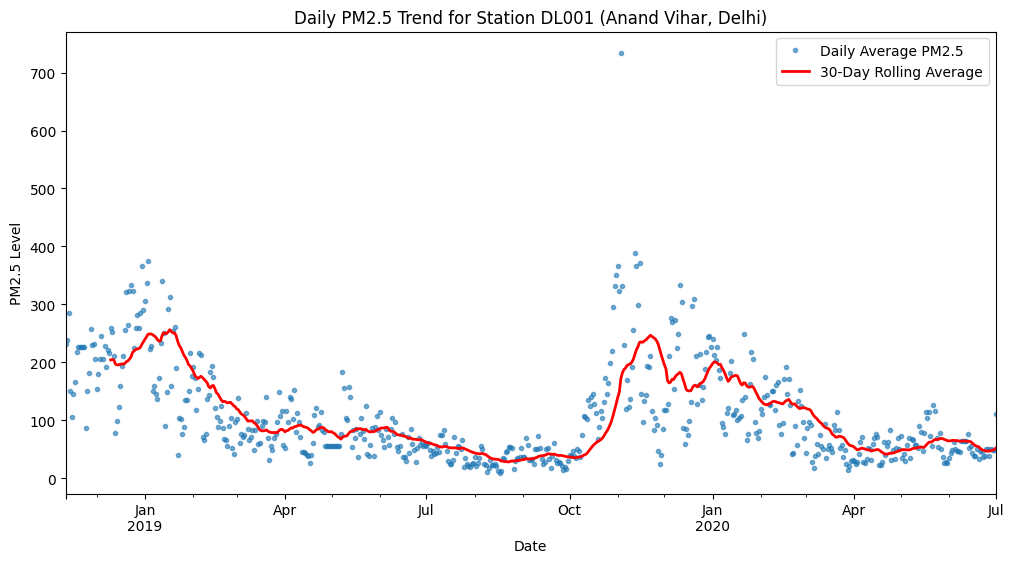

In [109]:
import matplotlib.pyplot as plt

# Plotting the daily average and a 30-day rolling average
plt.figure(figsize=(12, 6))
daily_avg.plot(label='Daily Average PM2.5', alpha=0.6, style='.')
daily_avg.rolling(window=30).mean().plot(label='30-Day Rolling Average', linewidth=2, color='red')

plt.title('Daily PM2.5 Trend for Station DL001 (Anand Vihar, Delhi)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()

In [110]:
# Which station always stays clean

grouped = df.groupby("StationId")["PM2.5"].agg(["mean", "std"]).sort_values(by = "mean")
clean_station = grouped[(grouped["mean"] < 30) & (grouped["std"] < 10)]
print(clean_station.head())

# but this will return unnecessary values because we filled the NaNs with zeros

            mean  std
StationId            
KA005       8.00  0.0
KA010      20.56  0.0


### 5.4 Which stations are the cleanest?

In [111]:
valid_pm25 = df[df["PM2.5"] >0 ]

overall_avg = df["PM2.5"].mean()

station_avg = valid_pm25.groupby("StationId")["PM2.5"].mean()

clean_stations = station_avg[station_avg < overall_avg].sort_values()
print(clean_stations.head())

StationId
KA005     8.000000
MH005    13.834888
MZ001    16.850531
KA010    20.560000
TN002    24.305092
Name: PM2.5, dtype: float64


## 6. Time-Series Visualization

### 6.1 What is the monthly PM2.5 trend in Delhi?
The line chart below visualizes the average PM2.5 level for each month in Delhi. This helps to clearly identify seasonal patterns in one of the country's major pollution hotspots.

In [112]:
# Creating a dataframe for Delhi's monthly PM2.5 average
# We use the clean city_day DataFrame as our source for this city-level analysis
delhi_df = city_day[city_day['City'] == 'Delhi'].copy()

# Create a column representing the month to group by
delhi_df['Month'] = delhi_df['Date'].dt.to_period('M')

# Group by the new 'Month' column and calculate the mean PM2.5
monthly_pm25 = delhi_df.groupby('Month')['PM2.5'].mean().reset_index()

# Convert the 'Month' period back to a timestamp for plotting
monthly_pm25['Month']  = monthly_pm25['Month'].dt.to_timestamp()

print("Created the 'monthly_pm25' DataFrame successfully.")

Created the 'monthly_pm25' DataFrame successfully.


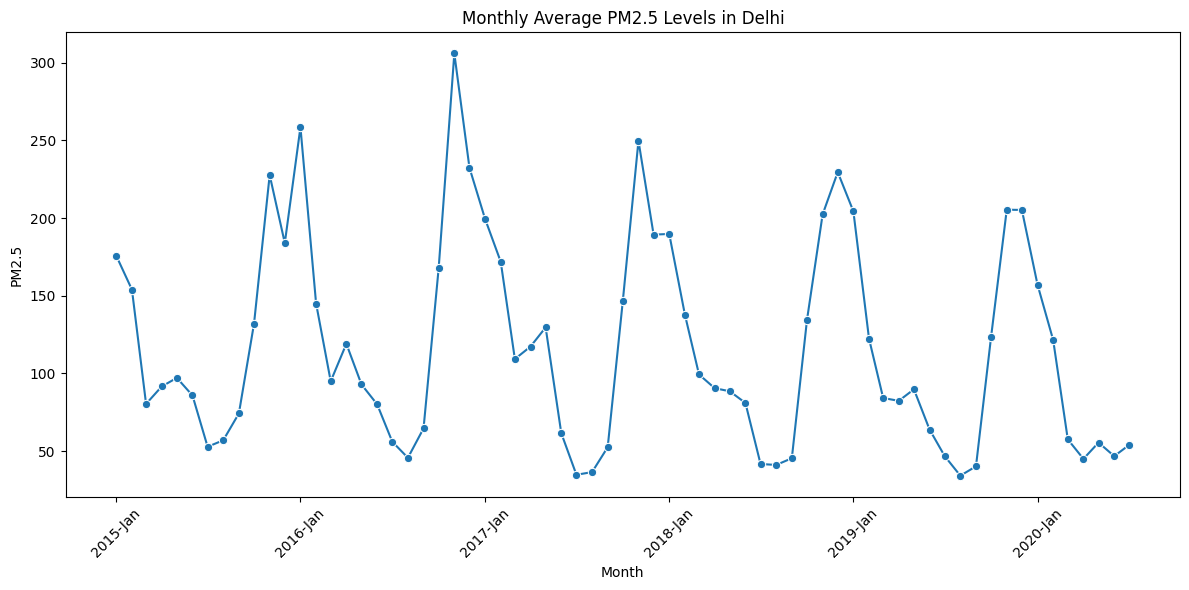

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Month', y='PM2.5', data=monthly_pm25, marker='o') 

# Define the date format
date_format = DateFormatter("%Y-%b") 
ax.xaxis.set_major_formatter(date_format)

# Add titles and labels
plt.title("Monthly Average PM2.5 Levels in Delhi")
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** The plot reveals a strong and predictable seasonal pollution cycle in Delhi.
* **Peak Pollution:** PM2.5 levels begin to rise sharply in October, peaking during the winter months (December-January). This is likely due to meteorological factors like temperature inversions, which trap pollutants close to the ground, combined with increased sources like heating.
* **Cleanest Period:** Levels are lowest during the monsoon season (July-September), as heavy rains effectively wash particulate matter from the atmosphere.

### 6.2 Which cities are the best and worst performers?
This bar chart compares the average PM2.5 levels of the top 5 most polluted and top 5 least polluted cities from the dataset.

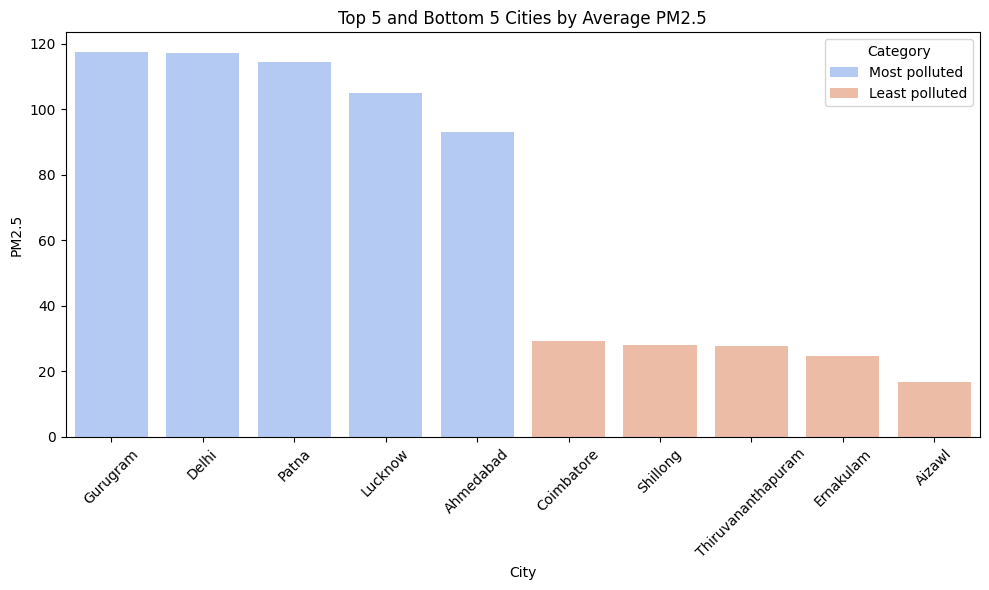

In [115]:
# top 5 and bottom 5 cities based on average PM2.5.
city_averagepm25 = city_day.groupby('City')['PM2.5'].mean().sort_values(ascending=False)
# ------------------------------------

top5 = city_averagepm25.head(5)
bottom5 = city_averagepm25.tail(5)

# combining both for plotting
compare_df = pd.concat([top5, bottom5]).reset_index()

# label cities
compare_df['Category'] = ['Most polluted']*5 + ['Least polluted']*5

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='PM2.5', hue='Category', data=compare_df, dodge=False, palette='coolwarm')
plt.title('Top 5 and Bottom 5 Cities by Average PM2.5')
plt.xlabel('City')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** This chart highlights three critical points about pollution in India:
1.  **Massive Disparity:** There is a huge gap in air quality between different regions. The average PM2.5 in the most polluted cities is over **4 times higher** than in the cleanest cities, indicating a severe public health divide.
2.  **Geographical Clustering:** The most polluted cities (Gurugram, Delhi, etc.) are predominantly located in the densely populated **Indo-Gangetic Plains**. The least polluted cities (like Aizawl) are in the Northeast, which benefits from different geography and weather patterns.
3.  **Chronic vs. Safe Air:** The average levels in the top cities fall into the "Poor" to "Very Poor" categories, meaning residents experience unhealthy air year-round. In contrast, the bottom cities enjoy air that is, on average, "Good" or "Satisfactory".

### 6.3 How does pollution vary by season across all cities?
To confirm the trend seen in Delhi on a national scale, this bar chart shows the average PM2.5 level aggregated by season across all available city data.

C:\Users\Rk\AppData\Local\Temp\ipykernel_9780\1337094055.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Season', y = 'PM2.5', data = seasonal_pm25, order= ['Winter', 'Summer', 'Monsoon', 'Autumn'], palette='Blues')


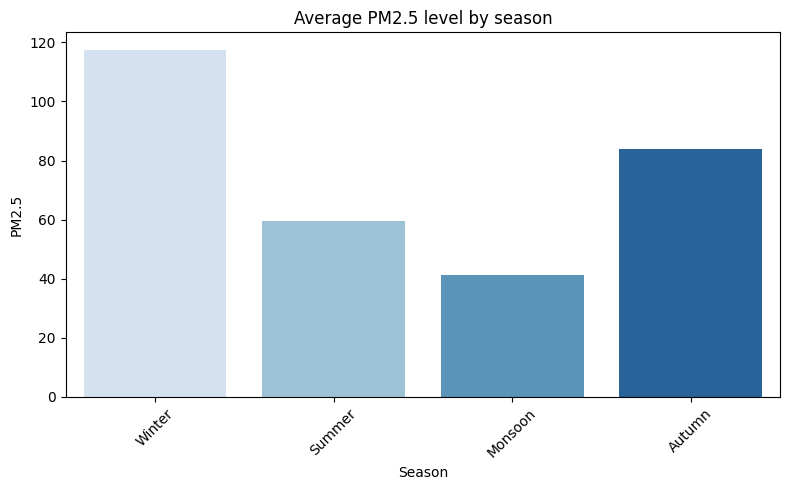

In [116]:
# finding how pollution varies by season- does it spike in winter(November-january) or drop in monsoon.

def get_season(month):
    if month in [11, 12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5, 6]:
        return 'Summer'
    elif month in [7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Autumn'

df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].apply(get_season)


seasonal_pm25 = df.groupby('Season')['PM2.5'].mean().reset_index()

plt.figure(figsize = (8, 5))
sns.barplot(x = 'Season', y = 'PM2.5', data = seasonal_pm25, order= ['Winter', 'Summer', 'Monsoon', 'Autumn'], palette='Blues')
plt.title('Average PM2.5 level by season')
plt.xlabel('Season')
plt.ylabel('PM2.5')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**Insight:** This visualization confirms that the trend seen in Delhi is a nationwide phenomenon.
* **Winter Peak:** **Winter** is consistently the most polluted season across all cities. This national trend reinforces the idea that meteorology plays a major role, as colder, stagnant air traps pollutants across large areas.
* **Monsoon Relief:** The **Monsoon** provides a country-wide relief from air pollution, demonstrating the powerful cleansing effect of seasonal rainfall.

## 7. Conclusion

This analysis of India's air quality data from 2015-2020 revealed several key insights:

* **Geographical Disparity:** Geographical Disparity: Pollution is not uniform. A clear geographical trend shows that cities in the Indo-Gangetic Plain (like Gurugram, Delhi, and Patna) experience the most severe PM2.5 levels. While Ahmedabad (Gujarat) is also highly polluted, it ranks below the top cities in the northern plains.
* **Strong Seasonality:** There is a clear and predictable seasonal pattern in air pollution, with levels peaking in Winter and reaching their lowest during the Monsoon.
* **Methodology Matters:** The data cleaning process, particularly the choice to use forward-fill (`ffill`) instead of filling with zeros, was crucial for achieving an accurate and realistic analysis of pollution trends.